# 无量纲化

## 1、归一化

In [36]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
data=[[-1,2],[-0.5,6],[0,10],[1,19]]

In [45]:
# 归一化
scaler=MinMaxScaler() #实例化
scaler=scaler.fit(data) # fit，本质生成min(x),max(x)
result=scaler.transform(data) # 通过接口导出结果
result

array([[0.        , 0.        ],
       [0.25      , 0.23529412],
       [0.5       , 0.47058824],
       [1.        , 1.        ]])

In [38]:
# 标准化
scaler2=StandardScaler() # 实例化
scaler2.fit(data) # fit，本质生成方差和均值
x_std=scaler2.transform(data) #通过接口导出结果
print(scaler2.mean_)
print(scaler2.var_)

[-0.125  9.25 ]
[ 0.546875 39.6875  ]


In [46]:
# 训练、导出结果一步达成
result1_=scaler1.fit_transform(data)
result1_

array([[ 5.        ,  5.        ],
       [ 6.25      ,  6.17647059],
       [ 7.5       ,  7.35294118],
       [10.        , 10.        ]])

In [47]:
# 归一化的结果逆转回去
scaler.inverse_transform(result_)

array([[-1.  ,  2.  ],
       [-0.5 ,  6.25],
       [ 0.  , 10.5 ],
       [ 1.  , 19.  ]])

In [48]:
# 使用MinMaxScaler的参数feature_range实现数据归一化到[0,1]以外的范围
scaler=MinMaxScaler(feature_range=[5,10])
result=scaler.fit_transform(data)
result

array([[ 5.        ,  5.        ],
       [ 6.25      ,  6.17647059],
       [ 7.5       ,  7.35294118],
       [10.        , 10.        ]])

In [43]:
# 归一化的结果逆转
scaler1.inverse_transform(result1)

## 数据特征多时，fit会报错，表示数据量太大无法计算，
## 可以用partial_fit作为训练接口
## scaler=scaler.partial_fit(data),result=scaler.transform(data)

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 19. ]])

In [20]:
## 利用numpy实现归一化 ,计算效率不会高于sklearn
import numpy as np
x=np.array([[-1,2],[-0.5,6],[0,10],[1,18]])
x_nor=(x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0))
x_nor 

[[-1.   2. ]
 [-0.5  6. ]
 [ 0.  10. ]
 [ 1.  18. ]]


In [17]:
# 逆转归一化
x_returned=x_nor*(x.max(axis=0)-x.min(axis=0))+x.min(axis=0)
x_returned

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

## 2、标准化

In [49]:
from sklearn.preprocessing import StandardScaler
data=[[-1,2],[-0.5,6],[0,10],[1,19]]

scaler=StandardScaler() # 实例化
scaler.fit(data) # fit，本质生成方差和均值
x_std=scaler.transform(data) #通过接口导出结果
print(scaler.mean_)
print(scaler.var_)

[-0.125  9.25 ]
[ 0.546875 39.6875  ]


In [32]:
x_std

array([[-1.18321596, -1.1508299 ],
       [-0.50709255, -0.51588926],
       [ 0.16903085,  0.11905137],
       [ 1.52127766,  1.54766779]])

In [33]:
x_std.mean()

0.0

In [34]:
x_std.std()

1.0

In [35]:
scaler.fit_transform(data)
scaler.inverse_transform(x_std)

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 19. ]])

 # 缺失值

In [50]:
import pandas as pd 
# index_col=0表示作为行标签的列
data=pd.read_csv(r"/Users/songhaiyue/Documents/课件/03数据预处理和特征工程/Narrativedata【瑞客论坛 www.ruike1.com】.csv",index_col=0)
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [51]:
# 可以看到Age、Sembarked有缺失
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         714 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [57]:
Age=data.loc[:,"Age"].values.reshape(-1,1) ## sklearn中特征矩阵必须是二维，利用reshape升维
Age[:10]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [nan],
       [54.],
       [ 2.],
       [27.],
       [14.]])

In [58]:
from sklearn.impute import SimpleImputer # 缺失值处理模块
imp_mean=SimpleImputer() ##实例化，用均值填补
imp_median=SimpleImputer(strategy="median") # 实例化，用中位数填补
imp_0=SimpleImputer(strategy="constant",fill_value=0) # 实例化，用0填补

imp_mean=imp_mean.fit_transform(Age)
imp_median=imp_median.fit_transform(Age)
imp_0=imp_0.fit_transform(Age)

In [59]:
imp_mean[:10]

array([[22.        ],
       [38.        ],
       [26.        ],
       [35.        ],
       [35.        ],
       [29.69911765],
       [54.        ],
       [ 2.        ],
       [27.        ],
       [14.        ]])

In [60]:
imp_median[:10]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [28.],
       [54.],
       [ 2.],
       [27.],
       [14.]])

In [61]:
imp_0[:10]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [ 0.],
       [54.],
       [ 2.],
       [27.],
       [14.]])

In [62]:
data.loc[:,"Age"]=imp_median 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         891 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [63]:
# 使用众数填补Embarked 
Embarked=data.loc[:,"Embarked"].values.reshape(-1,1)
imp_mode=SimpleImputer(strategy="most_frequent")
data.loc[:,"Embarked"]=imp_mode.fit_transform(Embarked)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         891 non-null float64
Sex         891 non-null object
Embarked    891 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


### 使用pandas和numpy进行填补

In [20]:
import pandas as pd 
import numpy as np
from scipy.interpolate import lagrange #拉格朗日函数
# index_col=0表示作为行标签的列
data=pd.read_csv(r"/Users/songhaiyue/Documents/课件/03数据预处理和特征工程/Narrativedata【瑞客论坛 www.ruike1.com】.csv",index_col=0)
data.info()
data[:20]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         714 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No
5,NaN,male,Q,No
6,54.0,male,S,No
7,2.0,male,S,No
8,27.0,female,S,Yes
9,14.0,female,C,Yes


In [8]:
# data.loc[:,"Age"]=data.loc[:,"Age"].fillna(data.loc[:,"Age"].median()) # 使用中位数进行填补，在DataFrame中直接进行填补
# data.loc[:,"Age"]=data.loc[:,"Age"].fillna(data.loc[:,"Age"].mean()) # 使用均值进行填补，在DataFrame中直接进行填补
data.loc[:,"Age"]=data.loc[:,"Age"].fillna(data.loc[:,"Age"].mode()[0]) # 使用众数进行填补，在DataFrame中直接进行填补
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         891 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [21]:
# data.columns
#自定义列向量插值函数
# def ploy(s,n,k=6):
#     y=s[list(range(n-k,n))+list(range(n+1,n+1+k))]#取数
#     y=y[y.notnull()]
#     return lagrange(y.index,list(y))(n)
# # for i in data.columns:
# for i in ["Age"]:
#     for j in range(len(data)):
#         if(data[i].isnull())[j]:
#             data[i][j]=ploy(data[i],j)
data.info()

/Users/songhaiyue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         891 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 74.8+ KB


In [22]:
data[:20]

,Age,Sex,Embarked,Survived
0,22.000000,male,S,No
1,38.000000,female,C,Yes
2,26.000000,female,S,Yes
3,35.000000,female,S,Yes
4,35.000000,male,S,No
5,75.255411,male,Q,No
6,54.000000,male,S,No
7,2.000000,male,S,No
8,27.000000,female,S,Yes
9,14.000000,female,C,Yes


In [68]:
data.loc[:,"Age"][:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [66]:
# .dropna(axis=0)删除所有缺失值的行，.dropna(axis=1)删除所有缺失值的列
# inplace=True表示在原数据集上进行修改，默认false，表示生成一个复制对象
data.dropna(axis=0,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 4 columns):
Age         889 non-null float64
Sex         889 non-null object
Embarked    889 non-null object
Survived    889 non-null object
dtypes: float64(1), object(3)
memory usage: 34.7+ KB


### 查看缺失值的分布

In [1]:
import pandas as pd 
import numpy as np
# index_col=0表示作为行标签的列
data=pd.read_csv(r"/Users/songhaiyue/Documents/课件/03数据预处理和特征工程/Narrativedata【瑞客论坛 www.ruike1.com】.csv",index_col=0)
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [72]:
data.isnull().sum()

,Age,Sex,Embarked,Survived
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
886,False,False,False,False
887,False,False,False,False
888,True,False,False,False
889,False,False,False,False


In [71]:
data.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Length: 891, dtype: int64

# 处理分类型特征：编码与哑变量

In [25]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder    ## 标签专用，能够将分类转换为分类数值
from sklearn.preprocessing import OrdinalEncoder  ## 特征专用，将分类特征转换为分类数值
# index_col=0表示作为行标签的列
data=pd.read_csv(r"/Users/songhaiyue/Documents/课件/03数据预处理和特征工程/Narrativedata【瑞客论坛 www.ruike1.com】.csv",index_col=0)
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [27]:
y=data.iloc[:,-1] # 输入为标签，故可以一维数据
le=LabelEncoder() #实例化
le=le.fit(y)      #导入数据
labels=le.transform(y) # transform接口调取结果
le.classes_ # 属性.classes_查看有多少类别

array(['No', 'Unknown', 'Yes'], dtype=object)

In [29]:
labels # 查看获取的结果

array([0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1,
       0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2,

In [30]:
# 导入和调取结果一步到位
le.fit_transform(y)

array([0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1,
       0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2,

In [32]:
# 使用inverse_transform可以逆转
le.inverse_transform(labels)

array(['No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'Unknown', 'Yes', 'No', 'No', 'No', 'Unknown', 'No', 'Yes', 'No',
       'Yes', 'Unknown', 'Yes', 'Yes', 'Yes', 'No', 'Unknown', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Unknown', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Unknown', 'No',
       'Unknown', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Unknown', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'Unknown', 'No', 'No', 'Yes', 'No', 'N

In [33]:
## 处理后的特征赋值
data.iloc[:,-1]=labels
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


In [47]:
## 正常情况下，如下表达
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder    ## 标签专用，能够将分类转换为分类数值
from sklearn.preprocessing import OrdinalEncoder  ## 特征专用，将分类特征转换为分类数值，不能导入一维数组
# index_col=0表示作为行标签的列
data=pd.read_csv(r"/Users/songhaiyue/Documents/课件/03数据预处理和特征工程/Narrativedata【瑞客论坛 www.ruike1.com】.csv",index_col=0)
data.iloc[:,-1]=LabelEncoder().fit_transform(data.iloc[:,-1])
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


In [48]:
data_=data.copy()
data_[:10]
## 类别数据中有空值时，应用OrdinalEncoder会报错
data_.loc[:,"Age"]=data_.loc[:,"Age"].fillna(data_.loc[:,"Age"].mode()[0])
data_.loc[:,"Embarked"]=data_.loc[:,"Embarked"].fillna(data_.loc[:,"Embarked"].mode()[0])

In [49]:
OrdinalEncoder().fit(data_.iloc[:,1:-1]).categories_ ## 查看每个特征中有多少类别，有空值时会报错

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [44]:
data_.iloc[:,1:-1]=OrdinalEncoder().fit_transform(data_.iloc[:,1:-1])
data_.head()

,Age,Sex,Embarked,Survived
0,22.0,1.0,2.0,0
1,38.0,0.0,0.0,2
2,26.0,0.0,2.0,2
3,35.0,0.0,2.0,2
4,35.0,1.0,2.0,0


In [60]:
## 哑变量
## 正常情况下，如下表达
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder    ## 标签专用，能够将分类转换为分类数值
from sklearn.preprocessing import OrdinalEncoder  ## 特征专用，将分类特征转换为分类数值，不能导入一维数组
from sklearn.preprocessing import OneHotEncoder   ## 独热编码，哑变量
# index_col=0表示作为行标签的列
data=pd.read_csv(r"/Users/songhaiyue/Documents/课件/03数据预处理和特征工程/Narrativedata【瑞客论坛 www.ruike1.com】.csv",index_col=0)
data.iloc[:,-1]=LabelEncoder().fit_transform(data.iloc[:,-1])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         714 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 34.8+ KB


In [61]:
## 有空值时，会报错
data.loc[:,"Age"]=data.loc[:,"Age"].fillna(data.loc[:,"Age"].mode()[0])
data.loc[:,"Embarked"]=data.loc[:,"Embarked"].fillna(data.loc[:,"Embarked"].mode()[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         891 non-null float64
Sex         891 non-null object
Embarked    891 non-null object
Survived    891 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 34.8+ KB


In [64]:
## Sex、embarked是名义变量，用哑变量处理
X=data.iloc[:,1:-1]
enc=OneHotEncoder(categories="auto").fit(X)
result=enc.transform(X).toarray()
result #数组，哑变量形式

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [65]:
## 依然可以一步到位
OneHotEncoder(categories='auto').fit_transform(X).toarray()

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [66]:
pd.DataFrame(enc.inverse_transform(result))

,0,1
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [67]:
# 哑变量后的五列特征名
enc.get_feature_names()

array(['x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S'], dtype=object)

In [69]:
# axis=1,跨行进行合并，即两表左右相连；axis=0,两表上下相连
newdata=pd.concat([data,pd.DataFrame(result,columns=enc.get_feature_names())],axis=1)
newdata.head()

,Age,Sex,Embarked,Survived,x0_female,x0_male,x1_C,x1_Q,x1_S
0,22.0,male,S,0,0.0,1.0,0.0,0.0,1.0
1,38.0,female,C,2,1.0,0.0,1.0,0.0,0.0
2,26.0,female,S,2,1.0,0.0,0.0,0.0,1.0
3,35.0,female,S,2,1.0,0.0,0.0,0.0,1.0
4,35.0,male,S,0,0.0,1.0,0.0,0.0,1.0


In [70]:
newdata.drop(["Sex","Embarked"],axis=1,inplace=True)
newdata.head()

,Age,Survived,x0_female,x0_male,x1_C,x1_Q,x1_S
0,22.0,0,0.0,1.0,0.0,0.0,1.0
1,38.0,2,1.0,0.0,1.0,0.0,0.0
2,26.0,2,1.0,0.0,0.0,0.0,1.0
3,35.0,2,1.0,0.0,0.0,0.0,1.0
4,35.0,0,0.0,1.0,0.0,0.0,1.0


# 处理连续型变量：二值化和分箱

In [81]:
## 正常情况下，如下表达
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder    ## 标签专用，能够将分类转换为分类数值
from sklearn.preprocessing import OrdinalEncoder  ## 特征专用，将分类特征转换为分类数值，不能导入一维数组
from sklearn.preprocessing import OneHotEncoder   ## 独热编码，哑变量
from sklearn.preprocessing import Binarizer       ## 连续变量二值化
# index_col=0表示作为行标签的列
data=pd.read_csv(r"/Users/songhaiyue/Documents/课件/03数据预处理和特征工程/Narrativedata【瑞客论坛 www.ruike1.com】.csv",index_col=0)
data.iloc[:,-1]=LabelEncoder().fit_transform(data.iloc[:,-1])

## 有空值时，会报错
data.loc[:,"Age"]=data.loc[:,"Age"].fillna(data.loc[:,"Age"].mode()[0])
data.loc[:,"Embarked"]=data.loc[:,"Embarked"].fillna(data.loc[:,"Embarked"].mode()[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         891 non-null float64
Sex         891 non-null object
Embarked    891 non-null object
Survived    891 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 34.8+ KB


In [78]:
# 将年龄二值化
data_2=data.copy()
x=data_2.iloc[:,0].values.reshape(-1,1)
transformer=Binarizer(threshold=30).fit_transform(x)
transformer.sum()
transformer

305.0

In [79]:
## 二值化后数据带入
data_2.iloc[:,0]=transformer
data_2.head()

,Age,Sex,Embarked,Survived
0,0.0,male,S,0
1,1.0,female,C,2
2,0.0,female,S,2
3,1.0,female,S,2
4,1.0,male,S,0


In [80]:
## 对标签二值化
data_2.iloc[:,3]=Binarizer(threshold=1).fit_transform(data_2.iloc[:,3].values.reshape(-1,1))
data_2.head()

,Age,Sex,Embarked,Survived
0,0.0,male,S,0
1,1.0,female,C,1
2,0.0,female,S,1
3,1.0,female,S,1
4,1.0,male,S,0


In [82]:
## 正常情况下，如下表达
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder    ## 标签专用，能够将分类转换为分类数值
from sklearn.preprocessing import OrdinalEncoder  ## 特征专用，将分类特征转换为分类数值，不能导入一维数组
from sklearn.preprocessing import OneHotEncoder   ## 独热编码，哑变量
from sklearn.preprocessing import Binarizer       ## 连续变量二值化
from sklearn.preprocessing import KBinsDiscretizer ## 连续变量分箱
# index_col=0表示作为行标签的列
data=pd.read_csv(r"/Users/songhaiyue/Documents/课件/03数据预处理和特征工程/Narrativedata【瑞客论坛 www.ruike1.com】.csv",index_col=0)
data.iloc[:,-1]=LabelEncoder().fit_transform(data.iloc[:,-1])

## 有空值时，会报错
data.loc[:,"Age"]=data.loc[:,"Age"].fillna(data.loc[:,"Age"].mode()[0])
data.loc[:,"Embarked"]=data.loc[:,"Embarked"].fillna(data.loc[:,"Embarked"].mode()[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         891 non-null float64
Sex         891 non-null object
Embarked    891 non-null object
Survived    891 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 34.8+ KB


In [83]:
x=data.iloc[:,0].values.reshape(-1,1)
est=KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='uniform')
est.fit_transform(x) # 二维数组

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],

In [86]:
# 查看转换后分的箱，变成一列中的三箱
# ravel是降维
set(est.fit_transform(x).ravel())

{0.0, 1.0, 2.0}

In [95]:
est=KBinsDiscretizer(n_bins=3,encode='onehot',strategy='uniform')
est.fit_transform(x).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [94]:
##  查看分类边界
est.bin_edges_

array([array([ 0.42      , 26.94666667, 53.47333333, 80.        ])],
      dtype=object)

# 特征选择 feature selection
## 方差过滤

In [96]:
## 导入数据
import pandas as pd
data=pd.read_csv(r"/Users/songhaiyue/Documents/课件/03数据预处理和特征工程/digit recognizor【瑞客论坛 www.ruike1.com】.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
x=data.iloc[:,1:]
y=data.iloc[:,0]
x.shape #42000行，784个特征
"""
数据量比较大，纬度高，如果用支持向量机、神经网络，会跑不出来；使用KNN跑一次大概需要半个小时
"""

(42000, 784)

In [129]:
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
from sklearn.feature_selection import VarianceThreshold ##方差过滤模块
selector=VarianceThreshold()  # 实例化，不填默认方差为0，即删除方差≤0的特征
x_var0=selector.fit_transform(x)  # 获取删除不合格特征之后的新特征矩阵
x_var0.shape ##干掉76个特征，剩余708个特征

(42000, 708)

In [104]:
pd.DataFrame(x_var0).head()

,0,1,2,3,4,5,6,7,8,9,...,698,699,700,701,702,703,704,705,706,707
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
## 获取保留特征的名称
x.columns[VarianceThreshold().fit(x).get_support(indices=False)]

Index(['pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel32', 'pixel33',
       'pixel34', 'pixel35', 'pixel36', 'pixel37',
       ...
       'pixel770', 'pixel771', 'pixel772', 'pixel773', 'pixel774', 'pixel775',
       'pixel776', 'pixel777', 'pixel778', 'pixel779'],
      dtype='object', length=708)

In [105]:
## 查看特征的中位数，可以一步到位减少特征数
import numpy as np
x.var().median() ## 每列的方差的中位数

1352.286703180131

In [106]:
x_fsvar=VarianceThreshold(x.var().median()).fit_transform(x) ## 利用方差的中位数，减少一半特征
x_fsvar.shape  ## 42000行，392个特征

(42000, 392)

In [135]:
## 获取保留特征的名称
x.columns[VarianceThreshold(x.var().median()).fit(x).get_support(indices=False)]

Index(['pixel96', 'pixel97', 'pixel98', 'pixel99', 'pixel100', 'pixel101',
       'pixel102', 'pixel121', 'pixel122', 'pixel123',
       ...
       'pixel691', 'pixel709', 'pixel710', 'pixel711', 'pixel712', 'pixel713',
       'pixel714', 'pixel715', 'pixel716', 'pixel717'],
      dtype='object', length=392)

In [120]:
## 只要top50个特征
x_fsvar1=VarianceThreshold(x.var().sort_values(ascending=False)[50]).fit_transform(x) ## 利用方差的中位数，减少一半特征
x_fsvar1.shape  ## 42000行，50个特征

(42000, 50)

In [138]:
## 获取保留特征的名称
x.columns[VarianceThreshold(x.var().sort_values(ascending=False)[50]).fit(x).get_support(indices=False)]

Index(['pixel181', 'pixel182', 'pixel183', 'pixel184', 'pixel185', 'pixel236',
       'pixel237', 'pixel238', 'pixel242', 'pixel263', 'pixel264', 'pixel270',
       'pixel353', 'pixel378', 'pixel379', 'pixel381', 'pixel382', 'pixel405',
       'pixel406', 'pixel409', 'pixel410', 'pixel433', 'pixel434', 'pixel436',
       'pixel437', 'pixel461', 'pixel462', 'pixel463', 'pixel464', 'pixel465',
       'pixel490', 'pixel491', 'pixel492', 'pixel546', 'pixel547', 'pixel549',
       'pixel572', 'pixel573', 'pixel574', 'pixel575', 'pixel576', 'pixel598',
       'pixel599', 'pixel600', 'pixel626', 'pixel627', 'pixel628', 'pixel629',
       'pixel630', 'pixel631'],
      dtype='object')

In [122]:
## 当特征是二分类时，特征取值是伯努利随机变量，var=p*(1-p)
# 假设p=0.8，即某种分类占比80%以上时删除特征
x_bvar=VarianceThreshold(0.8*(1-0.8)).fit_transform(x)
x_bvar.shape  ## 42000行，685个特征

(42000, 685)

In [137]:
## 获取保留特征的名称
x.columns[VarianceThreshold(0.8*(1-0.8)).fit(x).get_support(indices=False)]

Index(['pixel12', 'pixel13', 'pixel14', 'pixel34', 'pixel35', 'pixel36',
       'pixel37', 'pixel38', 'pixel39', 'pixel40',
       ...
       'pixel770', 'pixel771', 'pixel772', 'pixel773', 'pixel774', 'pixel775',
       'pixel776', 'pixel777', 'pixel778', 'pixel779'],
      dtype='object', length=685)

In [9]:
## 方差过滤对模型的影响
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold ##方差过滤模块
import numpy as np
import pandas as pd

## 导入数据
data=pd.read_csv(r"/Users/songhaiyue/Documents/课件/03数据预处理和特征工程/digit recognizor【瑞客论坛 www.ruike1.com】.csv")
data.head()

x=data.iloc[:,1:]
y=data.iloc[:,0]
x_fsvar=VarianceThreshold(x.var().median()).fit_transform(x)
x_fsvar.shape

(42000, 392)

In [ ]:
# python中的魔法命令，可以直接使用%timeit来计算运行这个cell中的代码所需的时间 
# 为了计算所需的时间，需要将这个cell中的代码运行很多次(通常是7次)后求平均值
# 因此运行%%timeit的时间会 远远超过cell中的代码单独运行的时间

In [41]:
#======KNN【TIME WARNING:35mins +】======# 
# KNN：全量特征
cross_val_score(KNN(),x,y,cv=5).mean()

0.9658569700264943

In [ ]:
## KNN：全量特征，查看模型运行时间
%timeit cross_val_score(KNN(),x,y,cv=5).mean()

In [ ]:
# KNN：特征选择后
cross_val_score(KNN(),x_fsvar,y,cv=5).mean()

In [ ]:
# KNN：特征选择后，查看模型运行时间
%timeit cross_val_score(KNN(),x_fsvar,y,cv=5).mean()

In [4]:
# 随机森林：全量特征
cross_val_score(RFC(n_estimators=10,random_state=0),x,y,cv=5).mean()

0.9380003861799541

In [6]:
# 随机森林：全量特征，查看模型运行时间
%timeit cross_val_score(RFC(n_estimators=10,random_state=0),x,y,cv=5).mean()

11.5 s ± 67.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
# 随机森林：特征选择后
cross_val_score(RFC(n_estimators=10,random_state=0),x_fsvar,y,cv=5).mean()

0.9388098166696807

In [8]:
# 随机森林：特征选择后，查看模型运行时间
%timeit cross_val_score(RFC(n_estimators=10,random_state=0),x_fsvar,y,cv=5).mean()

10.4 s ± 422 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## 相关性过滤 

In [9]:
## 卡方过滤，在方差过滤的基础上进行
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold ##方差过滤模块
from sklearn.feature_selection import SelectKBest  
from sklearn.feature_selection import chi2 # 卡方检验类
import numpy as np
import pandas as pd

## 导入数据
data=pd.read_csv(r"/Users/songhaiyue/Documents/课件/03数据预处理和特征工程/digit recognizor【瑞客论坛 www.ruike1.com】.csv")
data.head()

## 进行方差过滤，
x=data.iloc[:,1:]
y=data.iloc[:,0]
x_fsvar=VarianceThreshold(x.var().median()).fit_transform(x)
x_fsvar.shape

(42000, 392)

In [10]:
## 方差过滤是交叉验证分数提升，故在方差过滤后的特征上进行卡方过滤
x_fschi=SelectKBest(chi2,k=300).fit_transform(x_fsvar,y)
x_fschi.shape

(42000, 300)

In [11]:
# 验证模型效果，效果降低，说明k=300不合适
cross_val_score(RFC(n_estimators=10,random_state=0),x_fschi,y,cv=5).mean()

0.9333098667649198

In [13]:
## 方差过滤是交叉验证分数提升，故在方差过滤后的特征上进行卡方过滤
x_fschi=SelectKBest(chi2,k=370).fit_transform(x_fsvar,y)
x_fschi.shape
# 验证模型效果，效果降低，说明k=300不合适
cross_val_score(RFC(n_estimators=10,random_state=0),x_fschi,y,cv=5).mean()

0.939309975602983

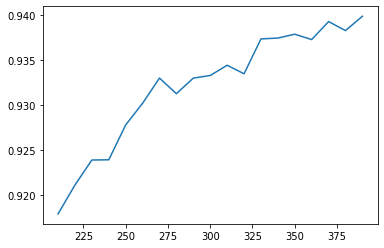

In [26]:
## 选取超参数K：1、看学习曲线
# 随着K值增加，模型表现上升，说明K越大越好
%matplotlib inline #图片内嵌显示
import matplotlib.pyplot as plt 
score=[]
for i in range(390,200,-10):
    x_fschi=SelectKBest(chi2,k=i).fit_transform(x_fsvar,y)
    once=cross_val_score(RFC(n_estimators=10,random_state=0),x_fschi,y,cv=5).mean()
    score.append(once)
plt.plot(range(390,200,-10),score)
plt.show()

In [27]:
## 选取超参数K：2、看p值
chivalue,pvalues_chi=chi2(x_fsvar,y)
chivalue

array([ 945664.84392643, 1244766.05139164, 1554872.30384525,
       1834161.78305343, 1903618.94085294, 1845226.62427198,
       1602117.23307537,  708535.17489837,  974050.20513718,
       1188092.19961931, 1319151.43467036, 1397847.8836796 ,
       1433554.26798015, 1429043.15373433, 1332663.17213405,
       1101423.25372261,  809989.56940485,  519266.71772284,
        285681.88297156,  191589.23696468,  902883.1255264 ,
       1237265.16042373, 1503477.73699155, 1625807.41495542,
       1630206.90922916, 1630597.02883804, 1633456.72909664,
       1610816.75571229, 1483382.49543886, 1256290.1574794 ,
        951236.1617682 ,  693192.66191748,  532386.96220361,
        504617.38933715,  575090.36046243,  501025.03733245,
        802341.10683194, 1078344.8724406 , 1226540.98318702,
       1269945.07968831, 1221758.57688808, 1146535.17810241,
       1080657.20185303, 1079065.30979135, 1092222.70610032,
       1064908.45385716, 1023327.00231067,  974163.15420165,
        918857.12860617,

In [28]:
pvalues_chi
## 大部分特征都与标签相关

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [32]:
## k取多少？p值大于某设定值，如0.05，0.01
## 所有方差过滤后的特征都被保存了
k=chivalue.shape[0]-(pvalues_chi>0.05).sum() ##加和的是布尔值
print(k)
x_fschi=SelectKBest(chi2,k=k).fit_transform(x_fsvar,y)
print(cross_val_score(RFC(n_estimators=10,random_state=0),x_fschi,y,cv=5).mean())

392
0.9388098166696807


### F检验

In [35]:
from sklearn.feature_selection import f_classif
F,pvalues_f=f_classif(x_fsvar,y)
F

array([ 618.65383492,  846.18897012, 1115.40617051, 1362.3677305 ,
       1452.03355369, 1381.09095571, 1138.26505266,  464.29616121,
        660.00977785,  849.66393412, 1004.7450309 , 1124.76177588,
       1200.99190762, 1209.29489877, 1110.4944286 ,  854.66183292,
        577.52063451,  342.09729054,  178.67397866,  118.01145533,
        612.12261014,  899.40904291, 1196.17528948, 1424.49864852,
       1569.26556677, 1742.49910702, 1910.98023795, 1969.20520223,
       1731.37475948, 1295.09668012,  839.15325001,  531.97951763,
        371.82392681,  336.00820537,  378.93378743,  317.47025479,
        528.94881012,  766.40792176,  947.63168717, 1086.0472161 ,
       1177.72017709, 1253.79641973, 1344.06961068, 1507.33781169,
       1616.50454434, 1512.25864876, 1289.65180587, 1051.26276412,
        839.48869386,  680.07426932,  600.85538567,  633.55772663,
        683.96908509,  347.65867784,  452.76238211,  509.16387684,
        515.7498157 ,  532.86107778,  594.62512658,  664.18740

In [36]:
pvalues_f

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 4.71193533e-220,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [38]:
k=F.shape[0]-(pvalues_f>0.05).sum()
k
## 仍然无法去除任何特征

392

### 互信息法

In [40]:
from sklearn.feature_selection import mutual_info_classif as MIC 
result=MIC(x_fsvar,y)
k=result.shape[0]-sum(result<=0)
k
# 仍然无法去除任何特征

392

# 嵌入法

In [7]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC 
import pandas as pd
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

## 导入数据
data=pd.read_csv(r"/Users/songhaiyue/Documents/课件/03数据预处理和特征工程/digit recognizor【瑞客论坛 www.ruike1.com】.csv")
data.head()

x=data.iloc[:,1:]
y=data.iloc[:,0]
x.shape

(42000, 784)

In [12]:
RFC_=RFC(n_estimators=10,random_state=0) ##随机森林实例化
x_embedded=SelectFromModel(RFC_,threshold=0.005).fit_transform(x,y) ## 嵌入法实例化
x_embedded.shape
# 在这里只想取出有限的特征，0.005对于784个特征的数据而言是非常高的阈值，
# 因为每个特征只能够分到0.001的feature_importantce_
# 仅剩47个特征，模型的维度明显降低了

(42000, 47)

In [11]:
RFC_.fit(x,y).feature_importances_.min()

0.0

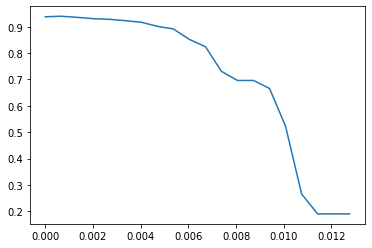

In [14]:
# 通过学习曲线寻找最佳阈值
%matplotlib inline
score=[]
threshold=np.linspace(RFC_.fit(x,y).feature_importances_.min(),RFC_.fit(x,y).feature_importances_.max(),20)
for i in threshold:
    x_embedded=SelectFromModel(RFC_,threshold=i).fit_transform(x,y)
    once=cross_val_score(RFC_,x_embedded,y,cv=5).mean()
    score.append(once)
plt.plot(threshold,score)
plt.show()

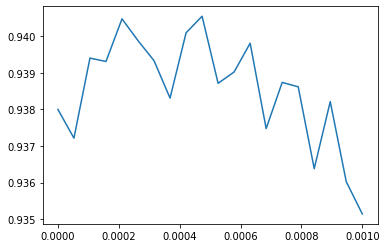

In [18]:
# 细化学习曲线，找到最高点
%matplotlib inline
score=[]
threshold=np.linspace(0,0.001,20)
for i in threshold:
    x_embedded=SelectFromModel(RFC_,threshold=i).fit_transform(x,y)
    once=cross_val_score(RFC_,x_embedded,y,cv=5).mean()
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [20]:
## 认为0.0005是最优点
RFC_=RFC(n_estimators=10,random_state=0)
x_embedded=SelectFromModel(RFC_,threshold=0.0005).fit_transform(x,y)
x_embedded.shape

(42000, 347)

In [21]:
cross_val_score(RFC_,x_embedded,y,cv=5).mean()
## 效果比方差过滤略好，所用特征347个,93.88%

0.9388816192491459

In [23]:
## 对随机森林进行调参
RFC_=RFC(n_estimators=100,random_state=0)
x_embedded=SelectFromModel(RFC_,threshold=0.0005).fit_transform(x,y)
cross_val_score(RFC_,x_embedded,y,cv=5).mean()
## 模型效果提升明显，约3pp
## 也可以画学习曲线选择最优n_estimators

0.9641431997325807

## 包装法

In [1]:
from sklearn.feature_selection import RFE 
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC 
import pandas as pd
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

## 导入数据
data=pd.read_csv(r"/Users/songhaiyue/Documents/课件/03数据预处理和特征工程/digit recognizor【瑞客论坛 www.ruike1.com】.csv")
data.head()

x=data.iloc[:,1:]
y=data.iloc[:,0]
x.shape

/Users/songhaiyue/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/songhaiyue/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/songhaiyue/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


(42000, 784)

In [2]:
RFC_=RFC(n_estimators=10,random_state=0) #随机森林实例化
selector=RFE(RFC_,n_features_to_select=340,step=50).fit(x,y) # RFE实例化
selector.support_ # 返回所有特征是否被选中的不二矩阵

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,

In [3]:
selector.support_.sum() ## 选中了340个特征

340

In [5]:
selector.ranking_
# 重要性相同，则排序相同

array([10,  9,  8,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  6,  6,
        5,  6,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  6,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  6,  6,  5,  4,
        4,  5,  3,  4,  4,  4,  5,  4,  5,  7,  6,  7,  7,  7,  8,  8,  8,
        8,  8,  8,  8,  8,  6,  7,  4,  3,  1,  2,  3,  3,  1,  1,  1,  1,
        1,  3,  3,  4,  5,  5,  5,  8,  8,  9,  9,  9,  9,  8,  9,  9,  4,
        4,  3,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  4,
        5,  5,  9,  9, 10, 10, 10, 10,  7,  4,  4,  3,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  5,  8, 10, 10, 10,
       10,  9,  4,  4,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  3,  4, 10, 10, 10, 10,  9,  7,  4,  3,  2,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        4,  4, 10,  9, 10

In [7]:
# 查看模型效果
cross_val_score(RFC_,x_wrapper,y,cv=5).mean()

0.937214229660641

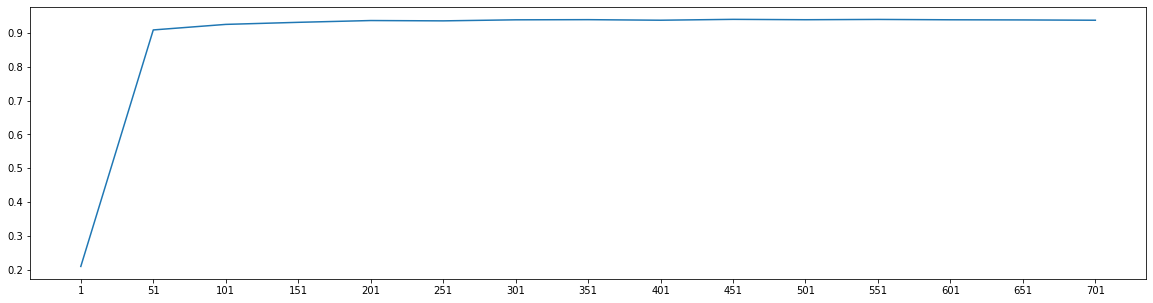

In [6]:
## 通过学习曲线寻找最优的n_features_to_select 
%matplotlib inline
score=[]
RFC_=RFC(n_estimators=10,random_state=0) #随机森林实例化
for i in range(1,751,50):
    x_wrapper=RFE(RFC_,n_features_to_select=i,step=50).fit_transform(x,y)
    once=cross_val_score(RFC_,x_wrapper,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,751,50),score)
plt.xticks(range(1,751,50))
plt.show()

## 51个特征时，交叉验证的效果已经达到90%以上

In [8]:
RFC_=RFC(n_estimators=10,random_state=0) #随机森林实例化
selector=RFE(RFC_,n_features_to_select=51,step=50).fit(x,y) # RFE实例化
cross_val_score(RFC_,x_wrapper,y,cv=5).mean()

0.937214229660641